In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [41]:
df.isnull().sum()

App                 0
Category            0
Rating           1474
Reviews             0
Size                0
Installs            0
Type                1
Price               0
ContentRating       1
Genres              0
LastUpdated         0
Current Ver         8
Android Ver         3
dtype: int64

In [42]:
df.dropna(inplace=True) #Dropping Rows with Null values

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.isnull().sum()#check...is there any null values remain.!

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
LastUpdated      0
Current Ver      0
Android Ver      0
dtype: int64

In [45]:
df.shape

(8886, 13)

In [46]:
df.dtypes  # Displaying Data types of each feature.

App               object
Category          object
Rating           float64
Reviews           object
Size              object
Installs          object
Type              object
Price             object
ContentRating     object
Genres            object
LastUpdated       object
Current Ver       object
Android Ver       object
dtype: object

In [47]:
#category
df.Category.value_counts()


FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

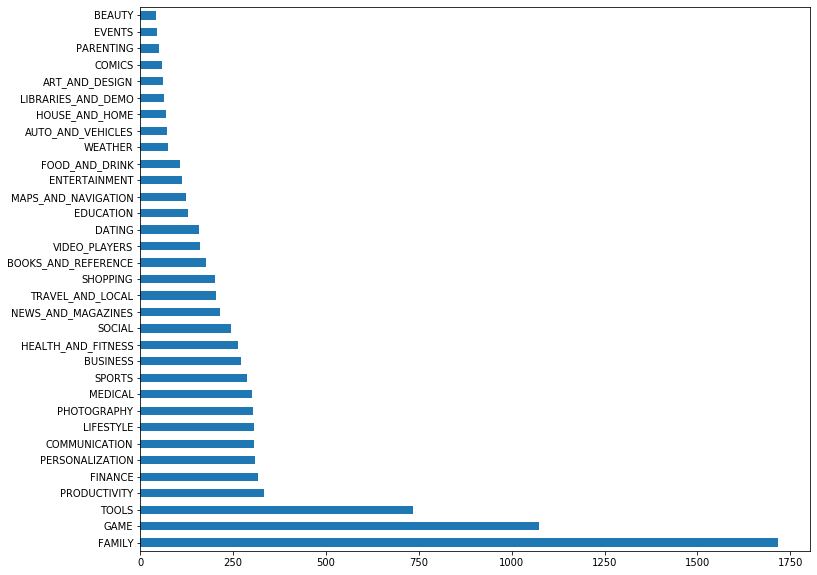

In [48]:
df.Category.value_counts().plot(kind='barh',figsize= (12,10))


In [49]:
#Rating
df['Rating'].describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Distribution Plot of 'Rating'

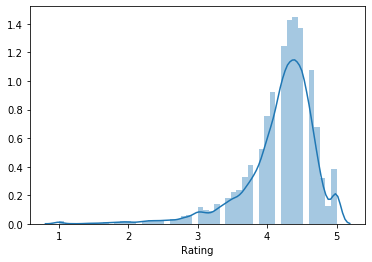

In [50]:
sns.distplot(df.Rating)


 Most of the apps, clearly hold a rating above 4.0 ! And surprisingly a lot seem to have 5.0 rating

In [51]:
#Changing  reviews to int type.
df.Reviews = df.Reviews.astype('int64') 

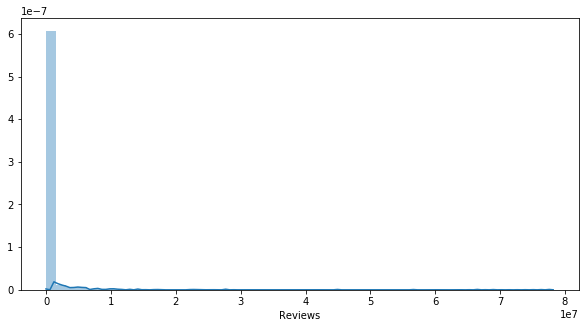

In [52]:
#Distribution Plot of the feature 'Reviews'
plt.figure(figsize=(10,5))
sns.distplot(df.Reviews)

([<matplotlib.patches.Wedge at 0x2bb0fbd1da0>,
 [Text(-1.0744351676595925, 0.2357733456018803, 'Free'),
  Text(1.0744351566222443, -0.23577339589982083, 'Paid')],
 [Text(-0.5860555459961413, 0.12860364305557104, '93.1%'),
  Text(0.5860555399757695, -0.12860367049081134, '6.9%')])

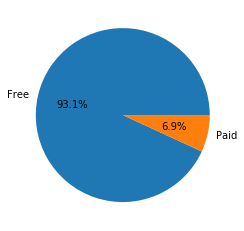

In [53]:
#Type
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')
#93% of the Apps are Free in the Play Store

In [54]:
#Android version
df['Android Ver'].value_counts()


4.1 and up            1987
4.0.3 and up          1197
Varies with device    1178
4.0 and up            1092
4.4 and up             789
2.3 and up             573
5.0 and up             481
4.2 and up             330
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              16
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
8.0 and up               5
4.4W and up              5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

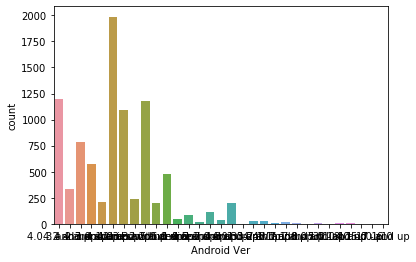

In [55]:
sns.countplot(df['Android Ver'])


Most of the apps support Android 4.0 and above.

Distribution plot of 'Installs' of Apps with 5.0 Ratings


In [56]:
df_full = df[df.Rating == 5]

df_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up


In [57]:
df_full.Installs.value_counts().sort_index()


1+           3
1,000+      37
10+         48
10,000+      1
100+       112
5+           8
5,000+       3
50+         32
500+        27
Name: Installs, dtype: int64


Consider the Apps with 5.0 Ratings and Maximum Installs:


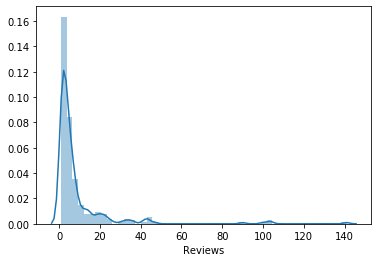

In [58]:
#Checking the No. of Reviews of 5.0 Rating Apps
sns.distplot(df_full.Reviews)


The above distribution is clearly skewed. Apps with very few reviews easily managed to get 5.0 ratings which can be misleading.
So let's filter out the ones with more than 30 reviews. 
These filtered ones are the apps that really stand for 5.0 rating.

In [60]:
df_full = df_full[df.Reviews > 30]
df_full.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,Current Ver,Android Ver
5196,AI Today : Artificial Intelligence News & AI 101,NEWS_AND_MAGAZINES,5.0,43,2.3M,100+,Free,0,Everyone,News & Magazines,"June 22, 2018",1,4.4 and up
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2.8M,100+,Free,0,Everyone,Photography,"January 23, 2018",1,4.1 and up
5852,Quran Khmer Offline AY,FAMILY,5.0,41,4.0M,"1,000+",Free,0,Everyone,Education,"December 13, 2017",10.6,4.2 and up
6823,Barisal University App-BU Face,FAMILY,5.0,100,10M,"1,000+",Free,0,Everyone,Education,"May 6, 2018",3.1.1,4.0.3 and up
7506,CL REPL,TOOLS,5.0,47,17M,"1,000+",Free,0,Everyone,Tools,"April 10, 2018",1.0.19,4.1 and up
7517,CL Notifier,TOOLS,5.0,36,3.2M,100+,Free,0,Teen,Tools,"August 2, 2017",1,4.0 and up
7842,CS & IT Interview Questions,FAMILY,5.0,43,3.3M,"1,000+",Free,0,Everyone,Education,"March 27, 2018",1.1,4.2 and up
8058,Oración CX,LIFESTYLE,5.0,103,3.8M,"5,000+",Free,0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1 and up
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12M,"5,000+",Free,0,Everyone,Comics,"July 31, 2018",1.0.5,5.0 and up
9496,Master E.K,FAMILY,5.0,90,Varies with device,"1,000+",Free,0,Everyone,Education,"August 11, 2017",1.5.0,4.4 and up


In [61]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())


No. of Apps having 5.0 Rating with sufficient Reviews:  16


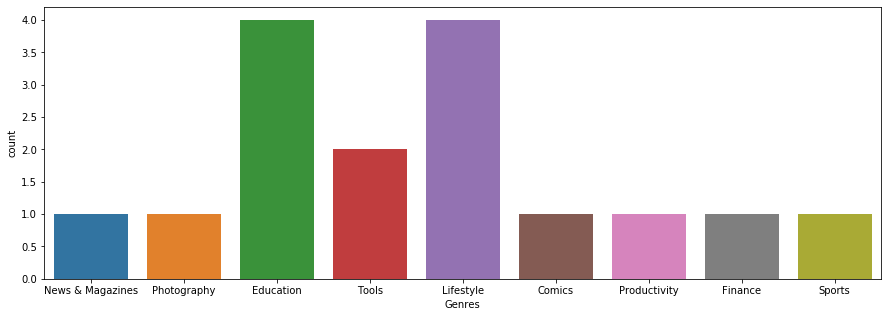

In [62]:
#genres
plt.figure(figsize=(15,5))
sns.countplot(df_full.Genres)

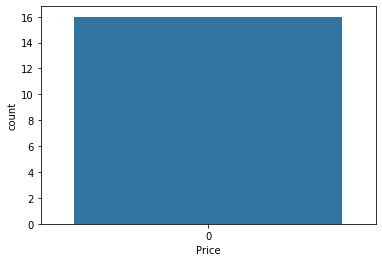

In [63]:
sns.countplot(df_full.Price)


All the Apps with 5.0 ratings are Free to install.